# Instalación de paquetes // Package instalation

[ESP] \
En primer lugar instalamos los paquetes que vamos a utilizar, en este caso:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

Lo haremos mediante el comando `!pip install [nombre_paquetes]`

[ENG] \
First, let's install the packages we're going to use, in this case:

* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

We'll be using the command `!pip install [packages_name]`

In [8]:
! pip install pandas seaborn numpy matplotlib scikit-learn

# Importación de paquetes // Importing packages

[ESP] \
Seguidamente los importamos con `import [nombre_paquete] as [alias]`

En el caso de scikit-learn solo utilizaremos una función de esta librería por ende nos limitamos a importar solo esta

[ENG] \
Next we import the packages using `import [package_name] as [alias]`

In scikit-learn's case, we will only use one of the functions from this library, so we only import said function

In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargamos el dataset // Loading the dataset

[ESP] \
Seguidamente cargaremos el dataset y comprobaremos que se haya cargado bien mostrando un ejemplo de las 5 primeras filas del mismo

[ENG] \
Next we load the dataset and check if there is any problem showing the first 5 rows as an example

In [10]:
df = pd.read_csv('diamonds.csv')

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Exploramos el dataset // Exploring the dataset

[ESP] \
En este apartado comprobaremos el tamaño del dataset, el contenido de sus columnas, sus estadísticas básicas y si contiene nulos

[ENG] \
In this section, we check the dataset's size, the content of its columns, its base statistics, and if it shows any null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53939 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53939 non-null  float64
 8   y        53940 non-null  float64
 9   z        53930 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


[ESP] \
Podemos observar que:
* Contamos con 9 columnas, de las cuales nuestra columna a predecir será 'cut'
* Contamos con 53940 entradas
* Contiene nulos

[ENG] \
We can observe that:
* We have 9 columns, from which  we want to predict the column 'cut'
* There are 53940 entries in total
* The dataset does contain null values

## Valores Nulos // Null values

[ESP] \
Utilizando el método .isnull() de panda y vemos que efectivamente contiene nulos

[ENG] \
Using the .isnull() method we can see that there's, in fact, null values

In [12]:
df.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       1
table       0
price       0
x           1
y           0
z          10
dtype: int64

[ESP] \
Imputamos valores faltantes:
* En columnas numéricas utilizaremos la mediana
* En columnas categóricas utilizaremos el valor más común

[ENG] \
Imputing missing values:
* In numerical columns we will use the median
* In categorical columns we will use the most common value.

In [13]:
from sklearn.impute import SimpleImputer

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='median') # para valores numéricos // for numeric values
df[numeric_cols] = imputer_num.fit_transform(df[numeric_cols])

imputer_cat = SimpleImputer(strategy='most_frequent') # para valores de texto // for categorical values
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

[ESP] \
Volvemos a comprobar los valores nulos

[ENG] \
We check the null values once again

In [14]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

[ESP] \
Vemos que ya no hay nulos

[ENG] \
We can see that now there are no null values

# Comprensión de los datos // Data Comprehension

## Univariable // Univariable

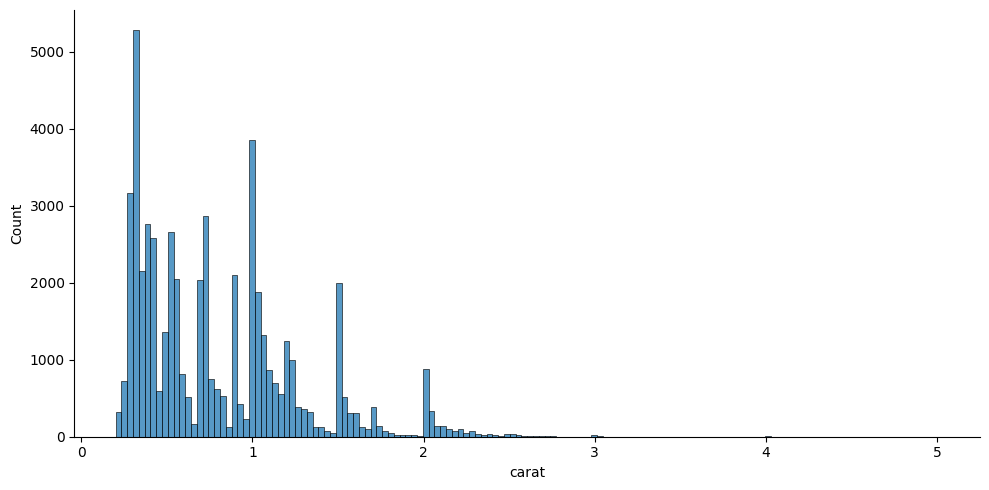

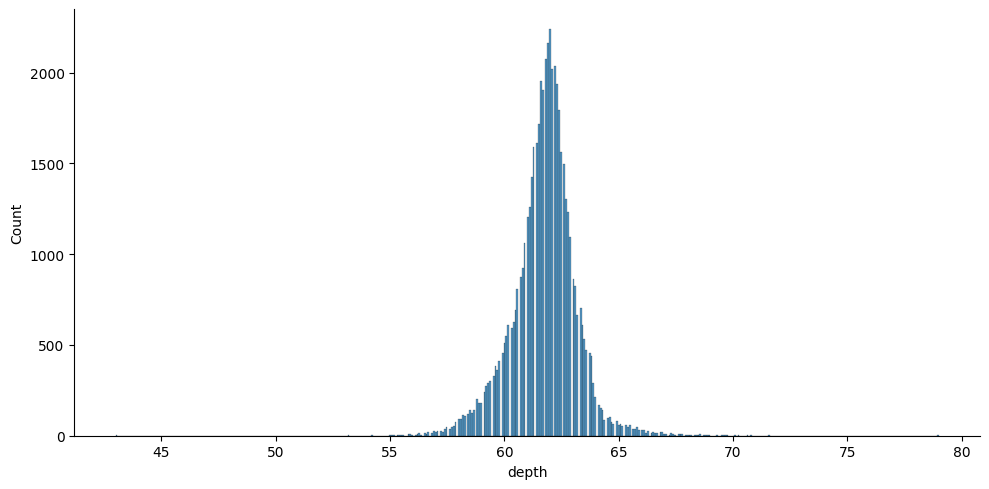

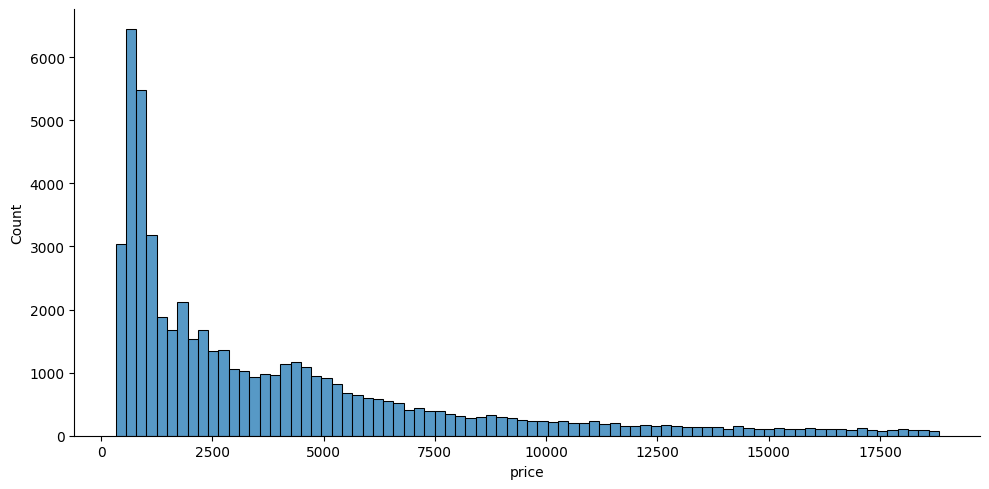

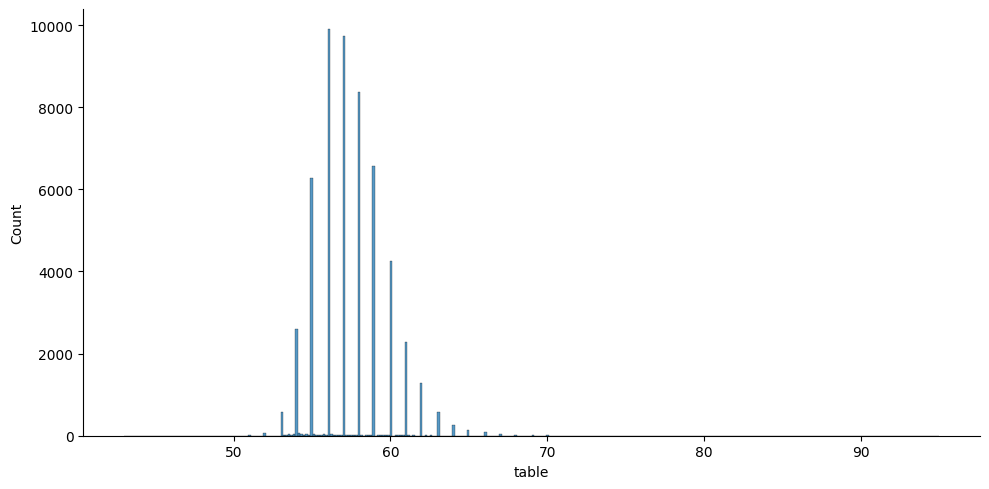

In [15]:
sns.displot(data=df, x="carat", height=5, aspect=2)
sns.displot(data=df, x="depth", height=5, aspect=2)
sns.displot(data=df, x="price", height=5, aspect=2)
sns.displot(data=df, x="table", height=5, aspect=2)


In [16]:
print(df['cut'].unique())
print(df['color'].unique())
print(df['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


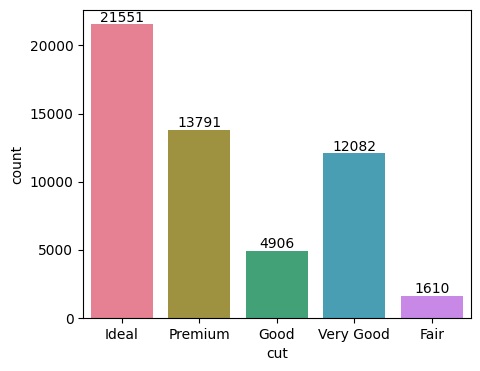

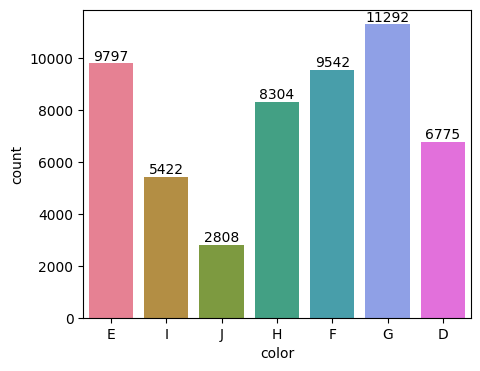

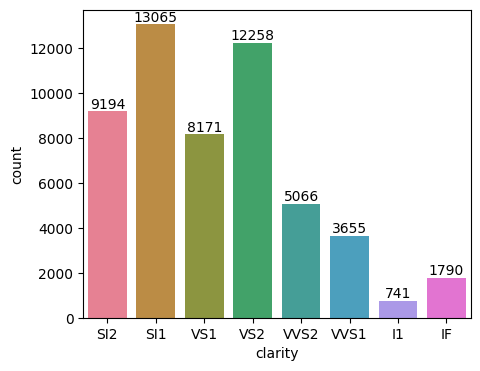

In [17]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="cut", hue="cut", palette='husl')
for container in ax.containers:
    ax.bar_label(container)
    
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="color", hue="color", palette='husl')
for container in ax.containers:
    ax.bar_label(container)
    
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x="clarity", hue="clarity", palette='husl')
# ax.set_ylim([10000, 15000])
for container in ax.containers:
    ax.bar_label(container)


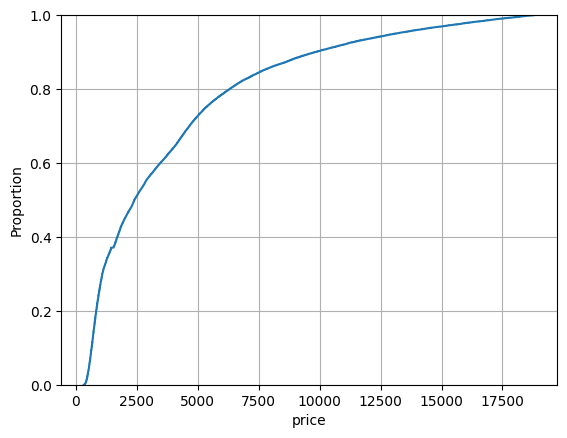

In [18]:
sns.ecdfplot(data=df, x='price')
plt.grid()



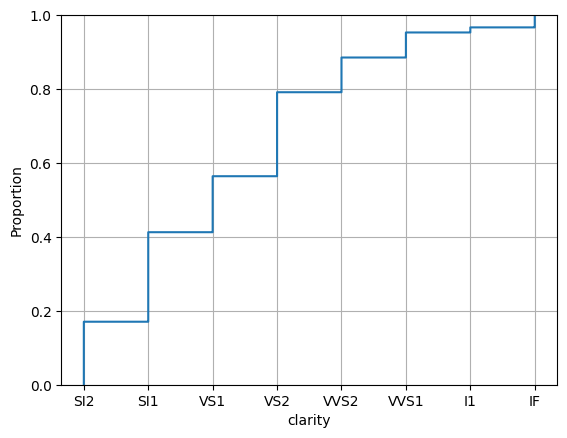

In [19]:
sns.ecdfplot(data=df, x='clarity')
plt.grid()

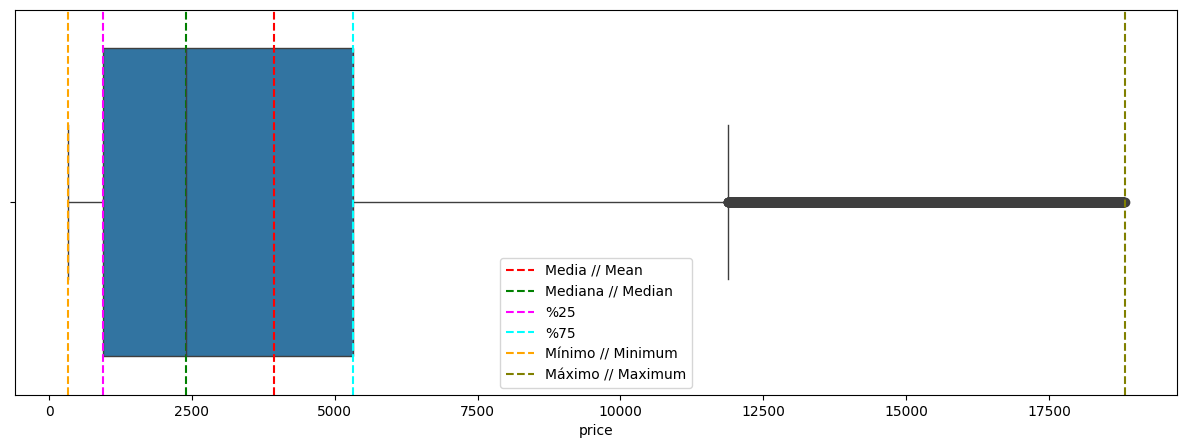

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='price')
mean_line = plt.axvline(df['price'].mean(), color='r', linestyle='--')
median_line = plt.axvline(df['price'].median(), color='g', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
p75_line = plt.axvline(df['price'].quantile(0.75), color='cyan', linestyle='--')
min_line = plt.axvline(df['price'].min(), color="orange", linestyle="--")
max_line = plt.axvline(df['price'].max(), color="olive", linestyle="--")

plt.legend(
    [mean_line, median_line, p25_line, p75_line, min_line, max_line], 
    ['Media // Mean', 'Mediana // Median', '%25', '%75', 'Mínimo // Minimum', 'Máximo // Maximum']
    )

## Bivariable // Bivariate

Text(0.5, 1.0, 'Distribución de precios por claridad de diamante // Price distribution by diamond clarity')

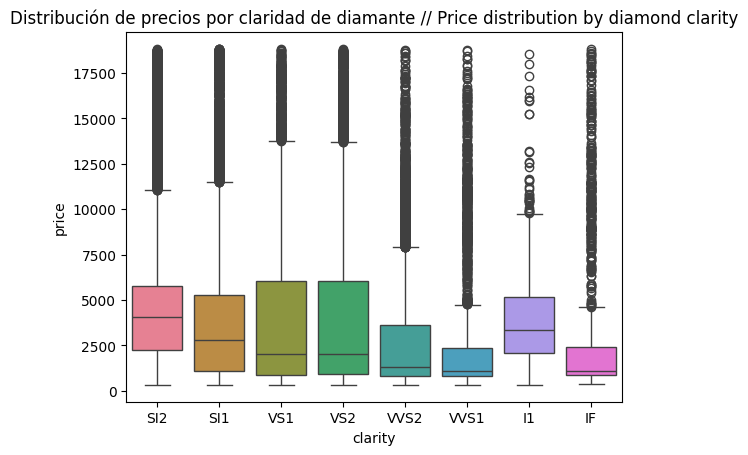

In [21]:
sns.boxplot(data=df, x='clarity', y='price',hue="clarity", palette='husl')
plt.title('Distribución de precios por claridad de diamante // Price distribution by diamond clarity')

<Axes: xlabel='cut', ylabel='carat'>

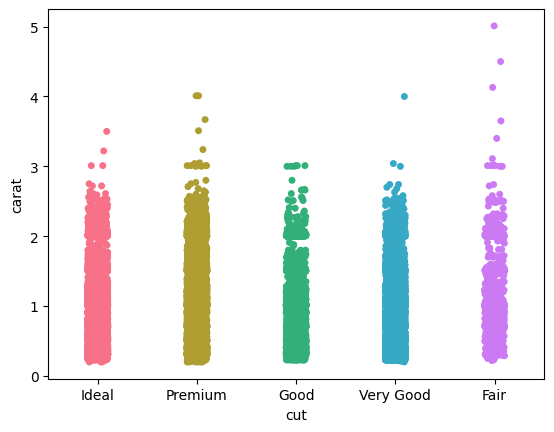

In [22]:
sns.stripplot(data=df, x='cut', y='carat',hue="cut", palette='husl')

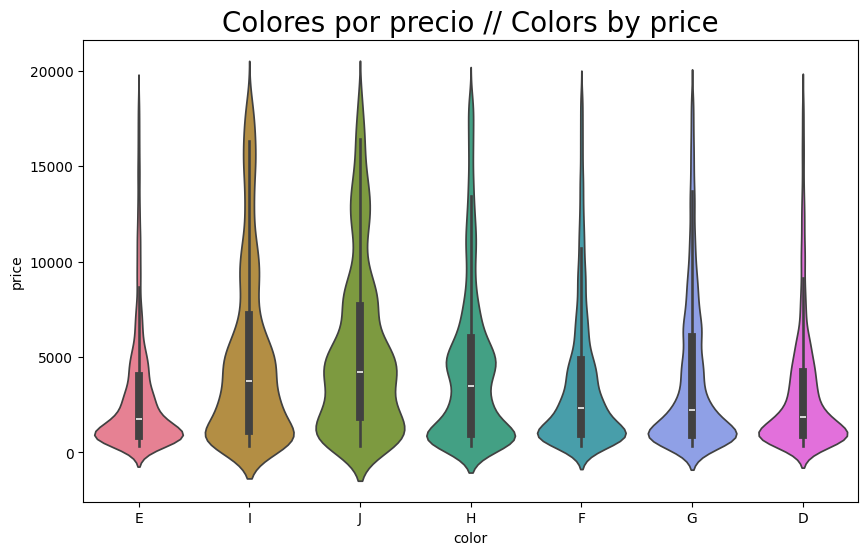

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.violinplot(x="color", y="price", data=df, hue="color", palette='husl')

ax.set_title("Colores por precio // Colors by price", fontsize=20)
plt.show()

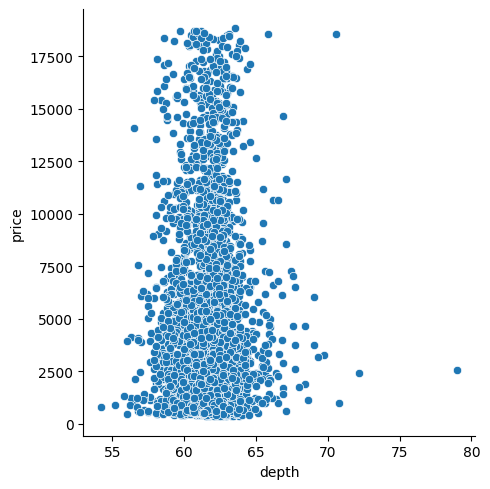

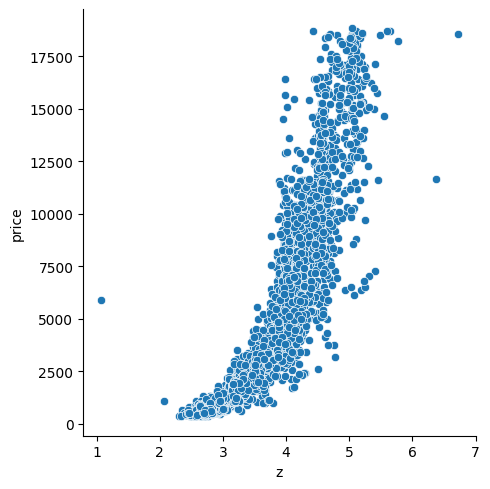

In [24]:
df_sample = df.sample(5000)
sns.relplot(data=df_sample, x='depth', y='price')

sns.relplot(data=df_sample, x='z', y='price')

Text(0.5, 1.0, 'Relación entre precio y quilates // Relationship between price and carat')

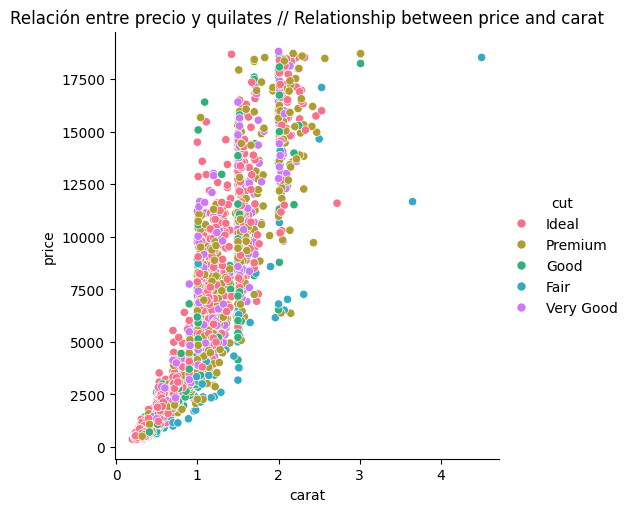

In [25]:
sns.relplot(data=df_sample, x='carat', y='price', hue='cut', palette='husl')
plt.title("Relación entre precio y quilates // Relationship between price and carat")

## Multivariable // Multivariable

/tmp/ipykernel_4955/2765775429.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='color', col='cut', kind='count',palette='husl')


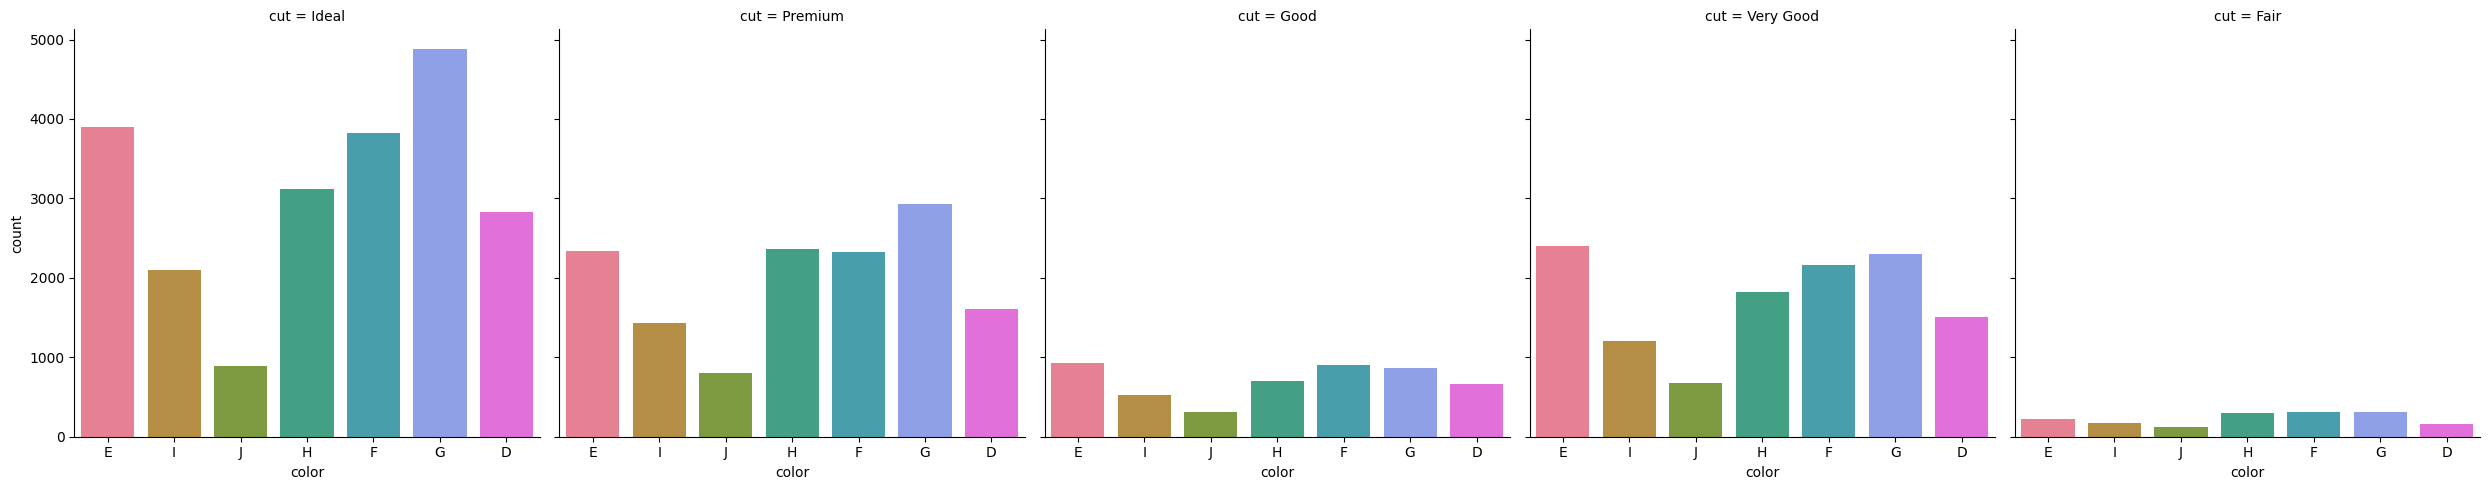

In [26]:
sns.catplot(data=df, x='color', col='cut', kind='count',palette='husl')

/tmp/ipykernel_4955/1803696377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='color', y='price', col='cut', kind='box',palette='husl')


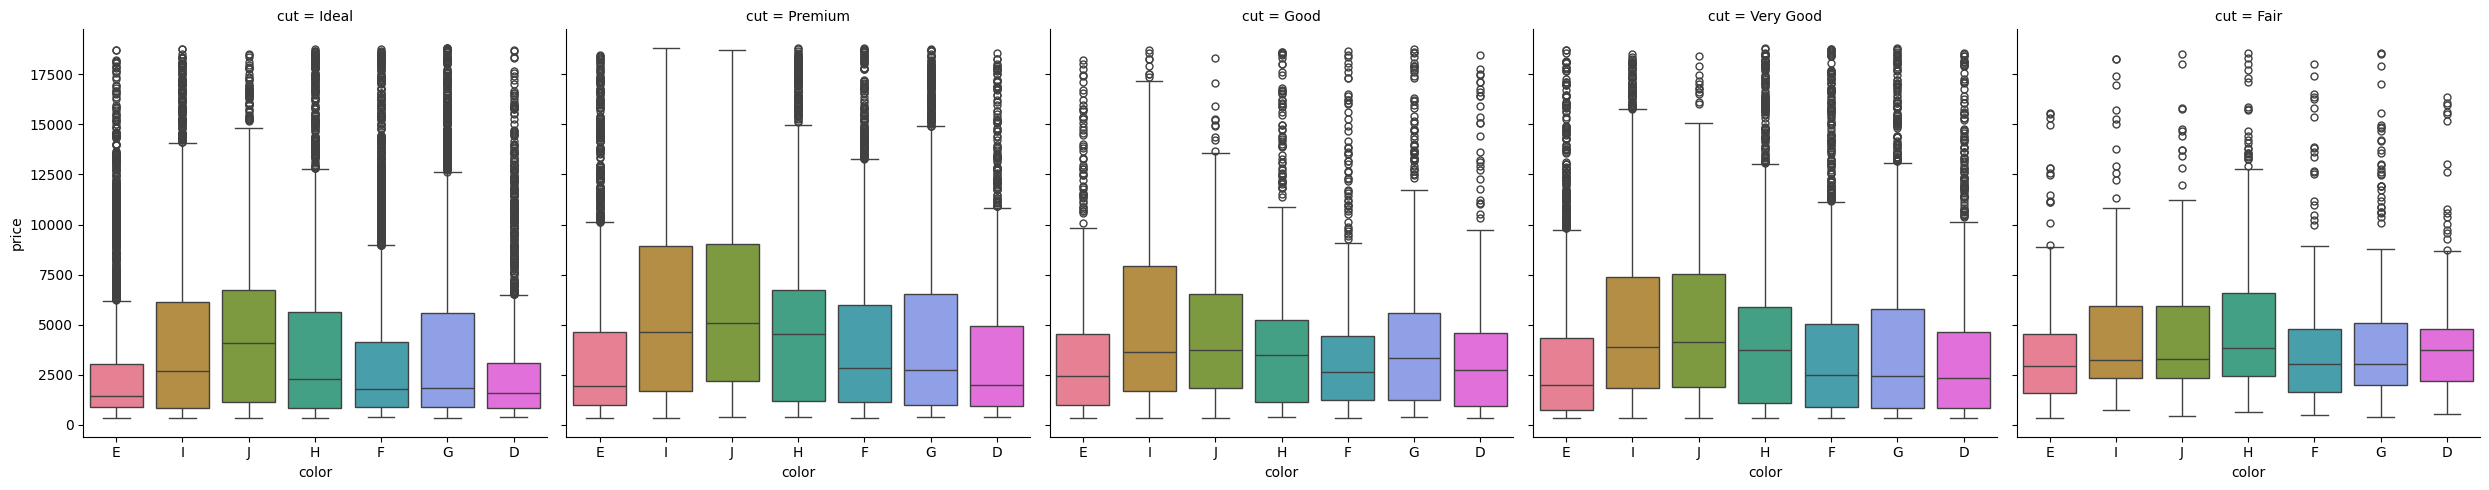

In [27]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='box',palette='husl')

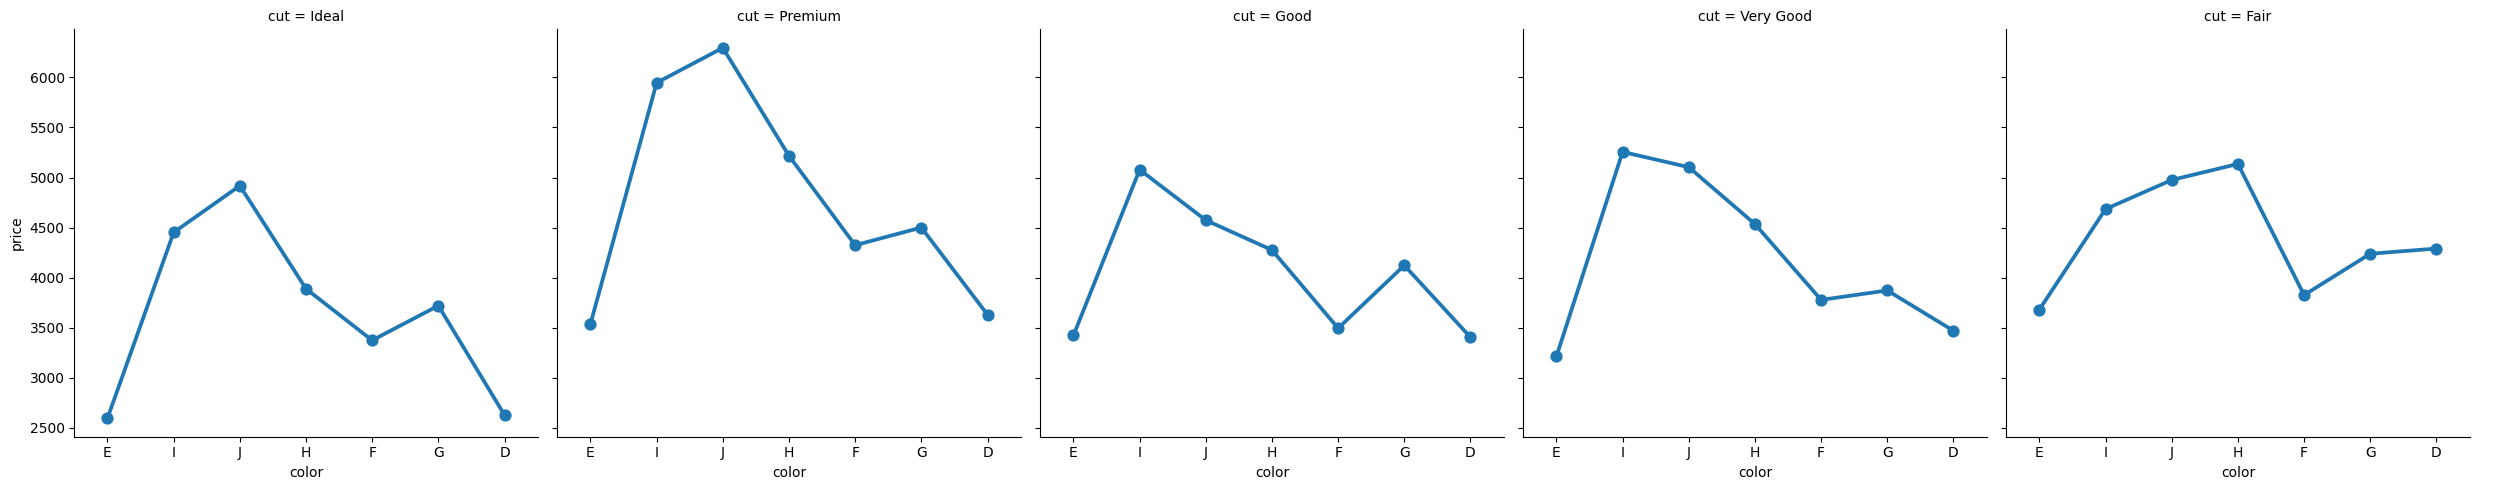

In [28]:
sns.catplot(data=df, x='color', y='price', col='cut', kind='point', errorbar=None)

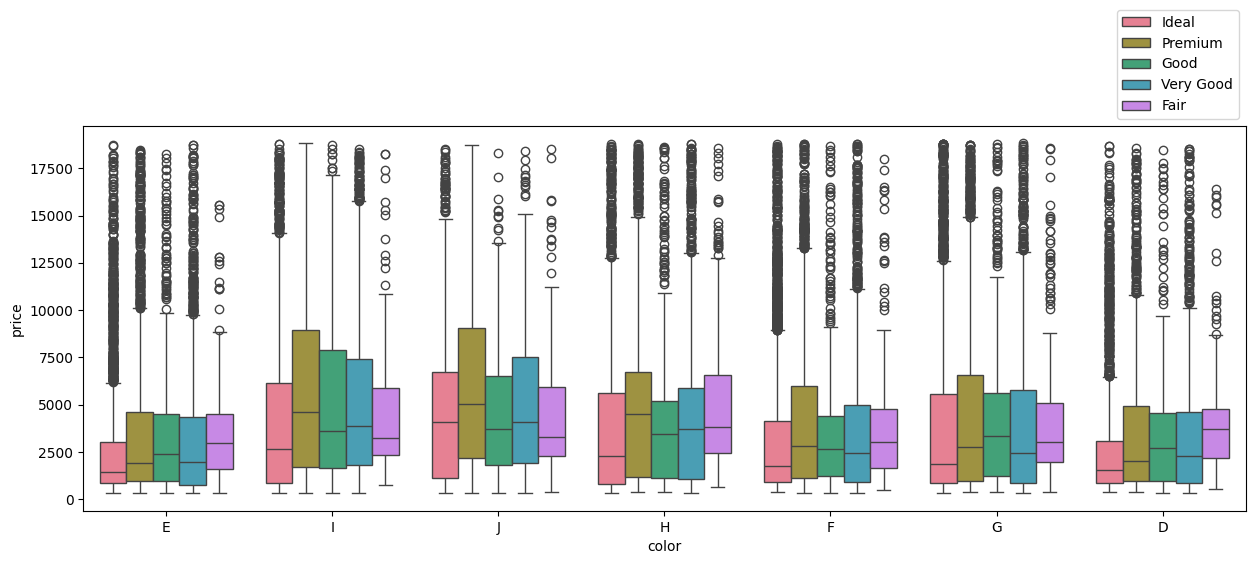

In [29]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='color', y='price', hue='cut', palette='husl')
plt.legend(loc='lower right', bbox_to_anchor=(1, 1))

<Axes: >

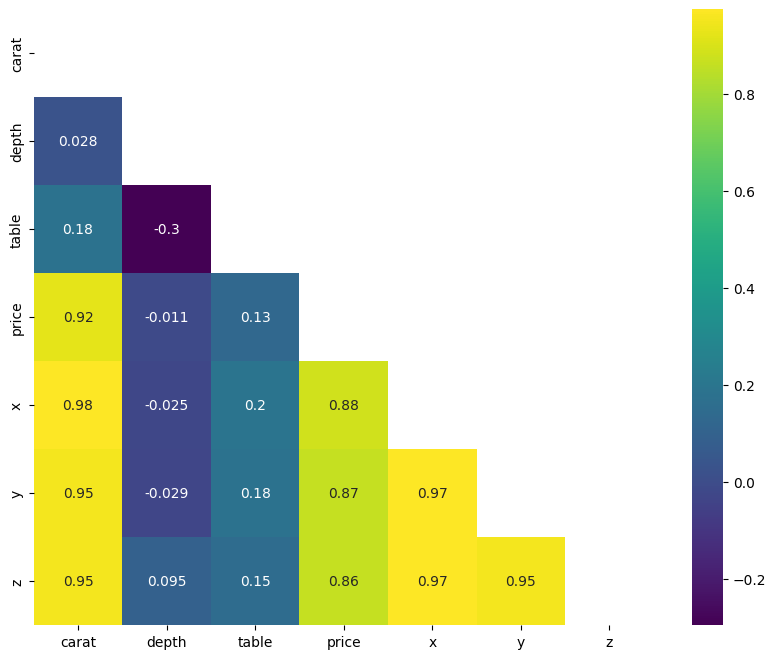

In [30]:
df_corr = df.corr(numeric_only=True)

# Crea el gráfico de calor // Creates the heat graph 
plt.figure(figsize=(10, 8))
filter = np.triu(df_corr)
sns.heatmap(df_corr, annot=True, cmap='viridis', mask=filter)

# Preprocesado // Preprocessing

[ESP] \
Antes de llevar las tareas de procesado a cabo separamos la X y la Y para sólo llevar acabo estas tareas en la X y dejar la Y intacta

[ENG] \
Before carrying out the processing tasks, we separate X and Y in order to only carry out these tasks in X and leave Y intact.


In [31]:
X = df.drop('cut', axis=1)  # Dejamos una columna para evitar multicolinealidad
y = df['cut']

## Tratamiento de nulos // Null processing 

[ESP] \
Llevado a cabo anteriormente para correcta visualización

[ENG] \
Carried out previously for correct visualization

## Codificación de variables categóricas // Coding of categorical variables
[ESP] \
Mediante el método get_dummies de pandas convertimos las variables categóricas a booleanas, lo hacemos solo en la X 

[ENG] \
Using the get_dummies method of pandas, we convert the categorical variables to boolean, we only do it in x

In [32]:
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']

X = pd.get_dummies(X, columns=categorical_columns)
X.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327.0,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,False,False,False,...,False,True,False,False,False,True,False,False,False,False


[ESP] \
Hacemos .info() para corroborar el tipo de las columnas

[ENG] \
We use .info() to check the type of the columns

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         53940 non-null  float64
 1   depth         53940 non-null  float64
 2   table         53940 non-null  float64
 3   price         53940 non-null  float64
 4   x             53940 non-null  float64
 5   y             53940 non-null  float64
 6   z             53940 non-null  float64
 7   color_D       53940 non-null  bool   
 8   color_E       53940 non-null  bool   
 9   color_F       53940 non-null  bool   
 10  color_G       53940 non-null  bool   
 11  color_H       53940 non-null  bool   
 12  color_I       53940 non-null  bool   
 13  color_J       53940 non-null  bool   
 14  clarity_I1    53940 non-null  bool   
 15  clarity_IF    53940 non-null  bool   
 16  clarity_SI1   53940 non-null  bool   
 17  clarity_SI2   53940 non-null  bool   
 18  clarity_VS1   53940 non-nu

[ESP] \
Convertimos las booleanas a int64 para que en vez de ser Verdadero / Falso sean 0 / 1 

[ENG] \
We convert the Booleans to int64 so that instead of being True / False they are 0 / 1.

In [34]:
# columnas a convertir // columns to convert
columns_to_convert = [col for col in X.columns if X[col].dtype == 'bool']


X[columns_to_convert] = X[columns_to_convert].astype('int64')

[ESP] \
Con un .head() comprobamos que está ok 

[ENG] \
Check with .head()  that everything is OK

In [35]:
df.head() 

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Escalado de características // Feature scaling

[ESP] \
Haremos uso del método StardardScaler para escalar nuestras características

[ENG] \
We will make use of the StardardScaler method to scale our features

In [36]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

features_df = X[features_to_scale]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

X_scaled = pd.concat([scaled_features_df, X.drop(features_to_scale, axis=1)], axis=1)

X_scaled.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174098,-1.099672,-0.904095,-1.587834,-1.536196,-1.571116,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360746,1.585529,-0.904095,-1.641322,-1.658774,-1.741162,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385028,3.375663,-0.903844,-1.498687,-1.457395,-1.741162,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454127,0.242928,-0.902090,-1.364968,-1.317305,-1.287705,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029394,1.082353,0.242928,-0.901839,-1.240163,-1.212238,-1.117659,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Particionamiento 80/20 // 80/20 Partitioning

[ESP] \
Con train_test_split separamos X_entrenamiento y X_test con un 80%/20%

[ENG] \
With train_test_split we separate X_train and X_test with 80%/20%

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo // Training the model

[ESP] \
En este caso utilizaremos 3 modelos distintos y los compararemos para ver cuál tiene más precisión a la hora de llevar acabo la predicción 
* Random Forest
* SVC
* Logistic Regression

[ENG] \
In this case we will use 3 different models and we will compare them to see which one has the best prediction accuracy
* Random Forest
* SVC
* Logistic Regression

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression()
}

# Entrenar y evaluar modelos // Training and evaluation of models

[ESP] \
Entrenamos los 3 modelos y guardamos en un array "results" los resultados de la precisión de los mismos 

[ENG] \
We train the 3 models and store the results of their accuracy in a "results" array

In [39]:
from sklearn.metrics import accuracy_score
results = {}
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Evaluar modelo en el conjunto de prueba
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Convertir los resultados en un DataFrame para comparación // Convert results to a DataFrame for comparison
[ESP] \
Guardamos los resultados de los modelos anteriores en un dataframe para luego poder comparar mediante visualizaciones

[ENG] \
We save the results of the previous models in a dataframe for later comparison by means of visualizations

In [40]:
results_df = pd.DataFrame(results.items(), columns=['Modelo', 'Precisión'])

# Visualizar los resultados // Visualize the results
[ESP] \
Compararemos la efectividad de los distintos modelos entrenados

[ENG] \
We will compare the effectiveness of the different trained models

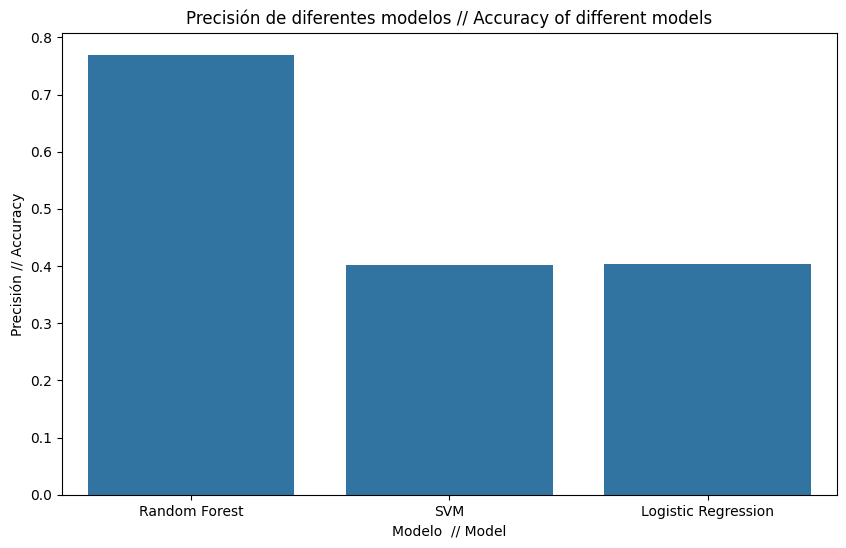

                Modelo  Precisión
0        Random Forest   0.769651
1                  SVM   0.402206
2  Logistic Regression   0.403597


In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Precisión', data=results_df)
plt.title('Precisión de diferentes modelos // Accuracy of different models')
plt.xlabel('Modelo  // Model')
plt.ylabel('Precisión // Accuracy')
plt.show()

print(results_df)